In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
#Load the data
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
ds = pd.read_csv("heartdisease_data.csv",names=column_names)
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [68]:
# DATA ANALYSIS - To check the structure of Data
ds.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [69]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
thalach     200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [70]:
# summary statistics
ds.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [71]:
#Missing values check
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

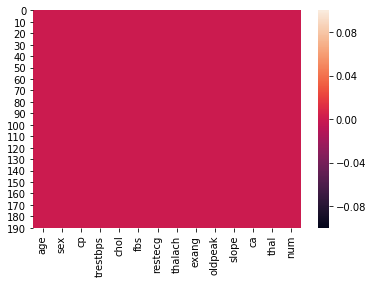

In [72]:
# DATA VISUALIZATION TO CHECK THE MISSING VALUES
sns.heatmap(ds.isnull())

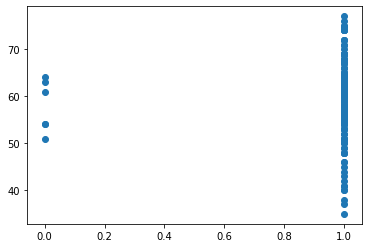

In [73]:
plt.scatter(ds['sex'],ds['age'])

<BarContainer object of 200 artists>

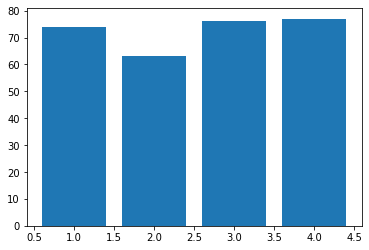

In [74]:
plt.bar(ds['cp'],ds['age'])

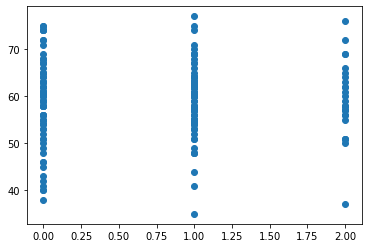

In [75]:
plt.scatter(ds['restecg'],ds['age'])

<BarContainer object of 200 artists>

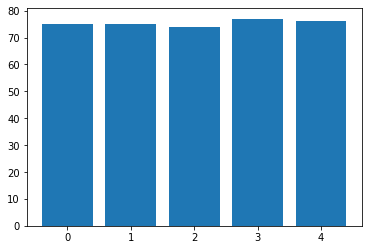

In [76]:
plt.bar(ds['num'],ds['age'])

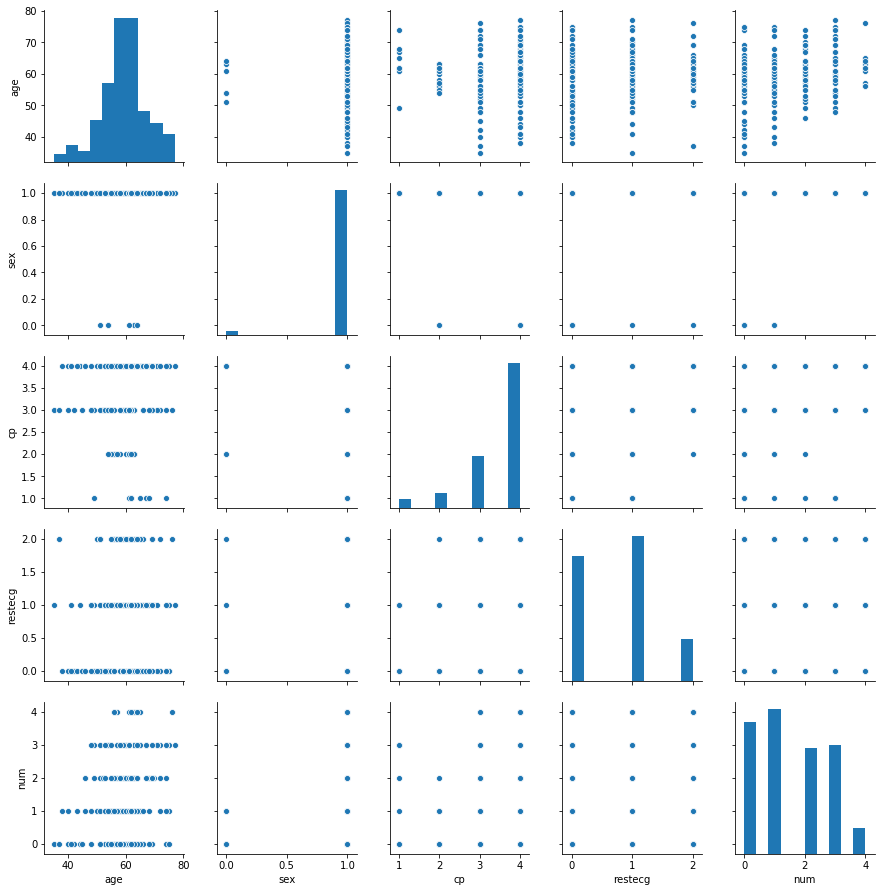

In [77]:
sns.pairplot(ds)

In [78]:
# To check the correlation
dscor=ds.corr()
dscor

,age,sex,cp,restecg,num
age,1.000000,0.034230,-0.038280,0.002400,0.287289
sex,0.034230,1.000000,0.038036,0.060621,0.147470
cp,-0.038280,0.038036,1.000000,0.034790,0.168210
restecg,0.002400,0.060621,0.034790,1.000000,-0.032800
num,0.287289,0.147470,0.168210,-0.032800,1.000000


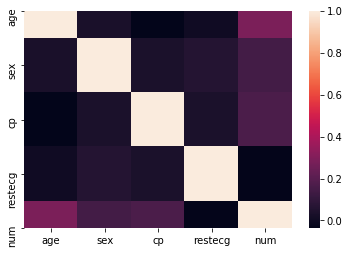

In [79]:
sns.heatmap(dscor)

In [80]:
feature_cols = ['age','sex','cp','restecg']
x = ds[feature_cols]
x.head()

,age,sex,cp,restecg
0,63,1,4,1
1,44,1,4,1
2,60,1,4,1
3,55,1,4,1
4,66,1,3,2


In [81]:
# check the type and shape of X
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 4)


In [82]:
# select a Series from the DataFrame
y = ds['num']

# you can select the Sales as an attribute of the DataFrame
y = ds.num
y.head()

0    2
1    0
2    2
3    1
4    0
Name: num, dtype: int64

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=12)

In [84]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.25
[[11 13  0  1  0]
 [ 7 14  0  9  0]
 [14  5  0  1  0]
 [12  8  0  0  0]
 [ 2  3  0  0  0]]
              precision    recall  f1-score   support

           0       0.24      0.44      0.31        25
           1       0.33      0.47      0.38        30
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         5

    accuracy                           0.25       100
   macro avg       0.11      0.18      0.14       100
weighted avg       0.16      0.25      0.19       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.32
[[ 8 10  3  4  0]
 [10 12  4  4  0]
 [ 6  4  7  3  0]
 [ 2  9  4  5  0]
 [ 0  3  2  0  0]]
              precision    recall  f1-score   support

           0       0.31      0.32      0.31        25
           1       0.32      0.40      0.35        30
           2       0.35      0.35      0.35        20
           3       0.31      0.25      0.28        20
           4       0.00      0.00      0.00         5

    accuracy                           0.32       100
   macro avg       0.26      0.26      0.26       100
weighted avg       0.30      0.32      0.31       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.33
[[13  7  3  1  1]
 [12  7  5  6  0]
 [ 9  4  5  2  0]
 [ 2  7  4  7  0]
 [ 0  4  0  0  1]]
              precision    recall  f1-score   support

           0       0.36      0.52      0.43        25
           1       0.24      0.23      0.24        30
           2       0.29      0.25      0.27        20
           3       0.44      0.35      0.39        20
           4       0.50      0.20      0.29         5

    accuracy                           0.33       100
   macro avg       0.37      0.31      0.32       100
weighted avg       0.33      0.33      0.32       100



In [92]:
# k= 10
haha=KNeighborsClassifier()
haha.fit(x_train,y_train)
haha.score(x_train,y_train)
predhaha=haha.predict(x_test)
print(accuracy_score(y_test,predhaha))
print(confusion_matrix(y_test,predhaha))
print(classification_report(y_test,predhaha))

0.3
[[11  7  4  3  0]
 [10  8  5  7  0]
 [ 7  4  8  1  0]
 [ 5  3  9  3  0]
 [ 0  1  3  1  0]]
              precision    recall  f1-score   support

           0       0.33      0.44      0.38        25
           1       0.35      0.27      0.30        30
           2       0.28      0.40      0.33        20
           3       0.20      0.15      0.17        20
           4       0.00      0.00      0.00         5

    accuracy                           0.30       100
   macro avg       0.23      0.25      0.24       100
weighted avg       0.28      0.30      0.28       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_prediction.csv')

In [96]:
from sklearn.externals import joblib
joblib.dump(svc,'svc_regressor.pkl')

['svc_regressor.pkl']